<a href="https://colab.research.google.com/github/aleksandraburakowska1/Maly_projekt1_Ola_i_Michal/blob/main/projekt_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



In [1]:
!git clone https://github.com/aleksandraburakowska1/Maly_projekt3_Ola_i_Michal


Cloning into 'Maly_projekt3_Ola_i_Michal'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 2.01 MiB | 5.11 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
%cd Maly_projekt3_Ola_i_Michal


/content/Maly_projekt3_Ola_i_Michal


In [3]:
!ls


 init.py
 io_clean.py
'Metadane oraz kody stacji i stanowisk pomiarowych.xlsx'
 metrics.py
 PM25_all_years.csv
 projekt_1_student.ipynb
 viz.py


In [4]:
import pandas as pd
import requests
import zipfile
import io, os

from Maly_projekt3_Ola_i_Michal.io_clean import (
    download_gios_archive,
    usun_wiersze_opisowe,
    load_gios_metadata,
    use_station_header,
    build_old2new,
    mapuj_kolumny_z_podgladem,
    build_kod2miasto,
    dodaj_multiindex,


)



In [7]:
from Maly_projekt3_Ola_i_Michal.metrics import (
    ensure_datetime,
    shift_midnight_to_prev_day,
    add_city_and_month,
    daily_station_mean,
    exceedance_days_per_year,
    select_top_bottom_stations)

In [8]:
from Maly_projekt3_Ola_i_Michal.viz import (

    plot_monthly_pm25,
    plot_pm25_heatmaps,
    plot_exceedance_bars)

In [9]:
# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}
meta_path = "/content/Maly_projekt3_Ola_i_Michal/Metadane oraz kody stacji i stanowisk pomiarowych.xlsx"
dfmeta = load_gios_metadata(meta_path)

# Przykladowe użycie
#df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [10]:
#zmiana zalecana przez prowadzącego
lata = [2014, 2019, 2024]

datasets = {}
for rok in lata:
    datasets[rok] = download_gios_archive(rok, gios_url_ids[rok], gios_pm25_file[rok])

datasets[2024].head(10)


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,Nr,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1,Kod stacji,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
5,Kod stanowiska,DsChojnowMalMOB-PM2.5-1g,DsJelGorOgin-PM2.5-1g,DsKlodzSzkol-PM2.5-1g,DsKudowaSzkoMOB-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpNaklWawrzy-PM2.5-1g,...,WmElkStadion-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpKoscianMayMOB-PM2.5-1g,WpPoznDabrow-PM2.5-1g,WpPoznSzwajc-PM2.5-1g,ZpDabkiSztorMOB-PM2.5-1g,ZpKolZolkiew-PM2.5-1g,ZpSzczAndrze-PM2.5-1g,ZpSzczPilsud-PM2.5-1g
6,2024-01-01 01:00:00,NaN,30.8,53.5,NaN,94,58.3,28.5,110.9,96.8,...,48.6,37.4,69.9,90.2,41.3,67.9,26.5,63.9,49.9,57.6
7,2024-01-01 02:00:00,NaN,30.2,61.3,NaN,44.8,44.8,73.9,39.5,37,...,12.8,18.8,57.1,55.4,38.4,88.7,26.8,33.5,15.4,24.6
8,2024-01-01 03:00:00,NaN,22.4,56.1,NaN,20.2,30.5,66.5,39.6,43.6,...,11,19,56,46.1,25.8,84.6,24.9,32.9,14.3,21.7
9,2024-01-01 04:00:00,NaN,11.2,27.6,NaN,14.7,18.5,66.8,36.2,42.6,...,10,18.7,44.1,26.9,16.3,75.8,26.4,32.6,17,20.1


In [11]:

#tutaj w tym fragmencie usuwam niepotrzebne wiersze (np. "wskaźnik")
# słownik z danymi źródłowymi (twoje DataFrame’y)

#zmienione według uwag prowadzącego

cleaned = usun_wiersze_opisowe(datasets)
cleaned[2014].head()
#odnosząc do poprzedniego: zamiast df2019_clean → używamy cleaned[2019]


2014: usunięto 2 wierszy opisowych, pozostało 8761
2019: usunięto 5 wierszy opisowych, pozostało 8761
2024: usunięto 5 wierszy opisowych, pozostało 8785


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Kod stacji,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
1,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
2,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118
3,2014-01-01 03:00:00,129,102.48,NaN,59.189041,46.5652,66.425789,40.915695,NaN,91,...,33.58,34.36,138,114,43,34.427513,49.9,83,86.9602,120
4,2014-01-01 04:00:00,129,102.32,NaN,58.038334,45.8128,53.999668,37.817917,NaN,89,...,31.37,35.21,171,108,42,32.742474,52,73.1,74.8762,104


In [12]:
#mapowanie stary kod: nowy kod w słowniku
old2new = build_old2new(dfmeta)
old2new

{'DsBogatMob': 'DsBogatFrancMOB',
 'DsCzer02': 'DsCzerStraza',
 'DsDzia01': 'DsDzialoszyn',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsJeleniaGoraA': 'DsJelGorOgin',
 'DsJeleniaGoraPM': 'DsJelGorSoko',
 'DsKlodzkoA': 'DsKlodzSzkol',
 'DsZabkowSemi': 'DsZabkPowWar',
 'DsPolanZdrojMOB': 'DsKudSlon',
 'DsLegRzeczA': 'DsLegPolarna',
 'DsNRudaSrebP': 'DsNowRudSreb',
 'DsOlawaSemi': 'DsOlawZolnAK',
 'DsOlesnicaPM': 'DsOlesBrzozo',
 'DsOsieczow': 'DsOsieczow21',
 'DsPolkKasz': 'DsPolKasztan',
 'DsSniezka': 'DsSniezkaObs',
 'DsSwidMob': 'DsSwidnMarciMOB',
 'DsSwidRynek': 'DsSwidnRynek',
 'DsSzczDZPM': 'DsSzczaKolej',
 'DsTrzebnica': 'DsTrzebniMaj',
 'DsWalbWysA': 'DsWalbrzWyso',
 'DsWrocWisA': 'DsWrocAlWisn',
 'DsWrocBartA': 'DsWrocBartni',
 'DsWrocGrobla': 'DsWrocNaGrob',
 'DsWrocKorzA': 'DsWrocWybCon',
 'DsZgorzBohA': 'DsZgorBohGet',
 'DsZlotoryjaPM': 'DsZlotoStasz',
 'KpBrodnicaKochanowskiego': 'KpBrodKochan',
 'KpBydgBerlinga': 'KpBydFieldor',
 'KpBydBerling': 'KpB

In [13]:
#Zamiana wiersza "Kod stacji" na nagłówek i dodanie kolumny 'Data', żeby ujednolicić format
#potem zmapuję stare kody stacji na nowe zgodnie z metadanymi (słownik powyżej)

hdr = {}
for rok in lata:
    hdr[rok] = use_station_header(cleaned[rok])
hdr[2014]

,Data,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
0,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
1,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118
2,2014-01-01 03:00:00,129,102.48,NaN,59.189041,46.5652,66.425789,40.915695,NaN,91,...,33.58,34.36,138,114,43,34.427513,49.9,83,86.9602,120
3,2014-01-01 04:00:00,129,102.32,NaN,58.038334,45.8128,53.999668,37.817917,NaN,89,...,31.37,35.21,171,108,42,32.742474,52,73.1,74.8762,104
4,2014-01-01 05:00:00,105,88.73,NaN,59.658134,45.8128,52.23967,38.814861,NaN,83,...,32.27,35.54,163,88,40,32.714367,63.4,74.9,61.9866,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2014-12-31 20:00:00,52,8.5,20,46.1,NaN,67.56,78.434807,97.021,118,...,41.1,87.5,49,29,50,44.658291,34.22,52.6,13,41
8756,2014-12-31 21:00:00,53,8.2,15.6,41.4,NaN,64.9,68.647339,23.842,99,...,43.9,80.2,50,25,45,39.835423,33.2521,60.4,8,52
8757,2014-12-31 22:00:00,48,8,14.1,NaN,NaN,64.2,57.358459,20.4708,90,...,41.2,74.5,49,24,44,34.202221,31.19,57.5,41,53
8758,2014-12-31 23:00:00,54,7.3,13.2,34,NaN,54.47,51.250973,20.6976,90,...,39.9,75,50,29,44,26.227037,28.2383,43.6,18,40


In [14]:

kod2miasto = build_kod2miasto(dfmeta)
kod2miasto


{'DsBialka': 'Białka',
 'DsBielGrot': 'Bielawa',
 'DsBogatFrancMOB': 'Bogatynia',
 'DsBogChop': 'Bogatynia',
 'DsBogZatonieMob': 'Bogatynia',
 'DsBoleslaMOB': 'Bolesławiec',
 'DsBrzegGlog': 'Brzeg Głogowski',
 'DsChojnowKil': 'Chojnów',
 'DsChojnowMalMOB': 'Chojnów',
 'DsCzar07': 'Czarna Góra',
 'DsCzerStraza': 'Czerniawa',
 'DsCzLasMob': 'Czarny Las',
 'DsDusznikMOB': 'Duszniki-Zdrój',
 'DsDuszZiel': 'Duszniki-Zdrój',
 'DsDzialoszyn': 'Działoszyn',
 'DsDziePilsud': 'Dzierżoniów',
 'DsDzierKras': 'Dzierżoniów',
 'DsGlogMob': 'Głogów',
 'DsGlogNorw': 'Głogów',
 'DsGlogNorwArch': 'Głogów',
 'DsGlogOrzech': 'Głogów',
 'DsGlogowko': 'Głogówko',
 'DsGlogSikor': 'Głogów',
 'DsGlogWiStwo': 'Głogów',
 'DsGrodziec': 'Grodziec Mały',
 'DsJasnaSport': 'Jasna Góra',
 'DsJawDmow': 'Jawor',
 'DsJaworMOB': 'Jawor',
 'DsJedlinaZdrMOB': 'Jedlina-Zdrój',
 'DsJedlZdroj': 'Jedlina-Zdrój',
 'DsJelGorOgin': 'Jelenia Góra',
 'DsJelGorSoko': 'Jelenia Góra',
 'DsJelw05': 'Jeleniów',
 'DsJgCiep': 'Jelenia Góra'

In [15]:
mapped = {}
for rok in lata:
    mapped[rok] = mapuj_kolumny_z_podgladem(hdr[rok], old2new)

 Zmienione kolumny:
   DsWrocWisA  →  DsWrocAlWisn
   KpAirpWiktorowo  →  KpWiktorowoG
   KpBydgPlPozn  →  KpBydPlPozna
   KpBydgWarszawska  →  KpBydWarszaw
   KpTorunDziewulsk  →  KpToruDziewu
   LdLodzWIOSACzernik  →  LdLodzCzerni
   LdZgierzWIOSAMielcza  →  LdZgieMielcz
   LuZgoraWIOS_AUT  →  LuZielKrotka
   MpKrakowWIOSAKra6117  →  MpKrakAlKras
   MpKrakowWIOSBuja6119  →  MpKrakBujaka
   MpKrakowWIOSBulw6118  →  MpKrakBulwar
   MzLegionZegIMGW  →  MzLegZegrzyn
   MzPlockReja  →  MzPlocMiReja
   MzRadomTochter  →  MzRadTochter
   MzSiedlceKonar  →  MzSiedKonars
   MzWarNiepodKom  →  MzWarAlNiepo
   MzWarszUrsynow  →  MzWarWokalna
   MzZyrardRoosevel  →  MzZyraRoosev
   OpKkozle1a  →  OpKKozBSmial
   PdBialyMiejska  →  PdBialWaszyn
   PkPrzemyslWIOSGrunw  →  PkPrzemGrunw
   Pm.a08a  →  PmGdaLeczkow
   Pm.AM12.a  →  PmKosTargowa
   SkKielJagielWios  →  SkKielJagiel
   SkMalogCemen3  →  SkMalo11List
   SkPolanRuszcz  →  SkPolaRuszcz
   SlGliwiGliw_mewy  →  SlGliwicMewy
   SlKatowKato_k

In [16]:
mapped_proc = {}

for rok in lata:
    df_dt = ensure_datetime(mapped[rok])
    df_shift = shift_midnight_to_prev_day(df_dt)
    mapped_proc[rok] = df_shift


Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)
Kolumna Data przekonwertowana na datetime (błędne wartości: 0)


In [17]:
df_all = pd.concat(
    [mapped_proc[rok] for rok in lata],
    join="inner",
    ignore_index=True
)


In [18]:
#MultiIndex to po prostu wielopoziomowy indeks — czyli taki, gdzie:
#każda kolumna (lub wiersz) ma kilka warstw etykiet zamiast jednej.
df_all_multi = dodaj_multiindex(df_all, kod2miasto)
df_all_multi.head(10)


Miejscowość                          Wrocław    Bydgoszcz         Łódź  \
Kod stacji                 Data DsWrocAlWisn KpBydPlPozna LdLodzCzerni   
0           2014-01-01 01:00:00          152   116.214424    81.029259   
1           2014-01-01 02:00:00          137          NaN    210.36467   
2           2014-01-01 03:00:00          129          NaN    66.425789   
3           2014-01-01 04:00:00          129          NaN    53.999668   
4           2014-01-01 05:00:00          105          NaN     52.23967   
5           2014-01-01 06:00:00           92          NaN    56.738743   
6           2014-01-01 07:00:00           92    62.139446    54.783894   
7           2014-01-01 08:00:00           60          NaN     51.07201   
8           2014-01-01 09:00:00           44          NaN    46.928078   
9           2014-01-01 10:00:00           44          NaN    44.203243   

Miejscowość       Zgierz Zielona Góra       Kraków                 Legionowo  \
Kod stacji  LdZgieMielcz LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
0             119.696114          NaN          104           64        44.44   
1              70.337502          NaN          104           63       103.07   
2              40.915695          NaN           91           62        74.91   
3              37.817917          NaN           89           58        39.27   
4              38.814861          NaN           83           55        26.51   
5              40.452362          NaN           81           54        28.27   
6              40.300835          NaN           77           49        26.29   
7              37.902916          NaN           74           47        29.81   
8              40.842361          NaN           76           48        42.02   
9              46.946388          NaN           77           44         30.8   

Miejscowość        Płock  ...     Żyrardów Kędzierzyn-Koźle     Przemyśl  \
Kod stacji  MzPlocMiReja  ... MzZyraRoosev     OpKKozBSmial PkPrzemGrunw   
0                    NaN  ...          NaN              115       48.175   
1                    NaN  ...          NaN              134       33.747   
2                    NaN  ...          NaN              137       30.622   
3                    NaN  ...          NaN              137       28.642   
4                    NaN  ...          NaN              136       27.781   
5                    NaN  ...          NaN              142       27.774   
6                    NaN  ...          NaN              146       28.713   
7                    NaN  ...          NaN              124       28.745   
8                  26.87  ...          NaN               87        27.18   
9                  35.36  ...          NaN               69       28.657   

Miejscowość       Gdańsk     Katowice  Złoty Potok      Olsztyn       Kalisz  \
Kod stacji  PmGdaLeczkow SlKatoKossut SlZlotPotLes WmOlsPuszkin WpKaliSawick   
0                   58.4          104           32    84.121582          NaN   
1                   28.5          107           39    75.444382         82.5   
2                     27          114           43    34.427513           83   
3                   28.7          108           42    32.742474         73.1   
4                   25.7           88           40    32.714367         74.9   
5                   28.5           77           45    29.906473         77.4   
6                   31.6           85           46    28.310535         80.8   
7                   30.6           80           36    28.712681         84.3   
8                   30.7           87           46    24.954979         88.7   
9                   31.1           86           44    21.300711         81.9   

Miejscowość     Szczecin               
Kod stacji  ZpSzczAndrze ZpSzczPilsud  
0                105.489          109  
1                149.797          118  
2                86.9602          120  
3                74.8762          104  
4                61.9866           9

In [ ]:
#2024 był rokiem przystępnym, co wyjaśnia inną liczbę pomiarów w tym roku.



In [19]:
df_all_multi.to_csv("PM25_all_years.csv", index=False)
print("Zapisano do pliku PM25_all_years.csv")


Zapisano do pliku PM25_all_years.csv


In [21]:
#raz ustawiam lata i miasta co mnie interesują
lata_interesujące = [2014, 2024]
miasta_interesujące = ["Warszawa", "Katowice"]
df_sel = df_all[df_all["Data"].dt.year.isin(lata_interesujące)].copy()

# 2) long: Data | Kod_stacji | PM25
df_long = df_sel.melt(
    id_vars="Data",
    var_name="Kod_stacji",
    value_name="PM25"
)

# 3) miasto z mapowania

df_long["Miasto"] = df_long["Kod_stacji"].map(kod2miasto)
miasta_interesujące = ["Warszawa", "Katowice"]
# 4) tylko Warszawa i Katowice
df_wc = df_long[df_long["Miasto"].isin(miasta_interesujące)].copy()

# 5) średnie miesięczne po wszystkich stacjach w mieście
monthly_city = (
    df_wc
    .groupby(
        [
            df_wc["Data"].dt.year.rename("Rok"),
            df_wc["Data"].dt.month.rename("Miesiac"),
            "Miasto"
        ]
    )["PM25"]
    .mean()
    .reset_index()
)

monthly_city.head()


,Rok,Miesiac,Miasto,PM25
0,2014,1,Katowice,47.531587
1,2014,1,Warszawa,30.313374
2,2014,2,Katowice,57.502297
3,2014,2,Warszawa,42.719269
4,2014,3,Katowice,42.855405


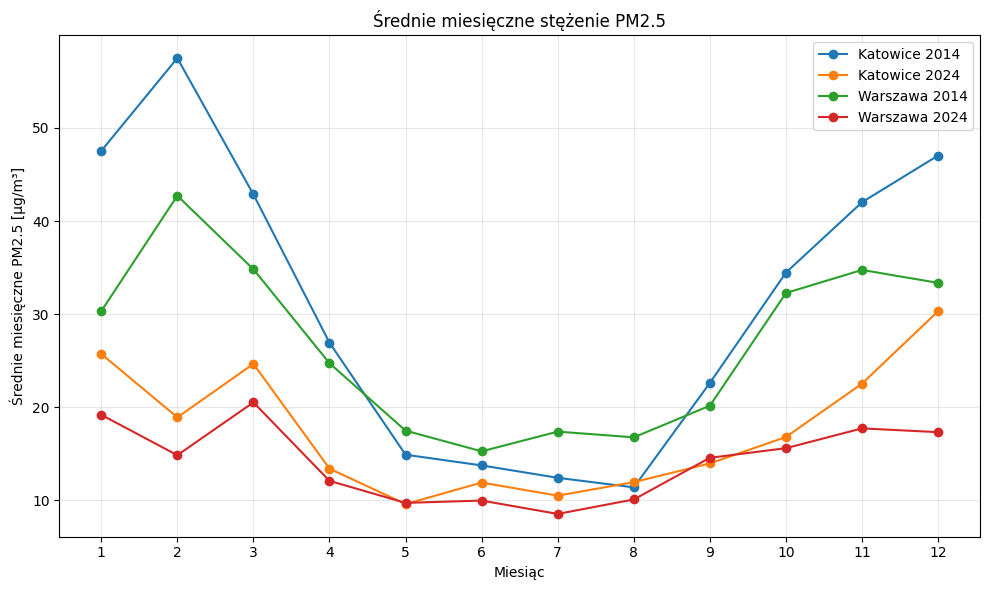

In [22]:
#wyciągam warszawę i katowice (już w vis.py)
plot_monthly_pm25(
    monthly_city
)

#obserwacje:
#-Zarówno w Warszawie, jak i w Katowicach, w roku 2014 stężenia PM2.5 były zauważalnie wyższe niż w 2024.
#- Największe różnice między 2014 a 2024 występują zimą (styczeń–luty oraz listopad–grudzień). To logiczne, bo zimą rośnie emisja z ogrzewania domów.
#- latem stężenie jest podobnie małe (jest małe zarówno w 2014 jak i 2024 roku, więc w tej kwestii nie pogorszyło się)
#- Katowice w obu latach miały wyższe wartości, co można wytłumaczyć tym, że Katowice leżą blisko kopalni
##  w roku 2024 w obu miastach duża poprawa - być może dzięki wymianie pieców i większej świadomości problemu zanieczyszczeń w społeczeństwie

3. Heatmapa miesięcznych średnich
Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

In [23]:
lata_do_heatmapy = [2014, 2019, 2024]
df_sel = df_all[df_all["Data"].dt.year.isin(lata_do_heatmapy)].copy()
df_long = df_sel.melt(
    id_vars="Data",
    var_name="Kod_stacji",
    value_name="PM25"
)
df_long["Miasto"] = df_long["Kod_stacji"].map(kod2miasto)
df_long["Miasto"].isna().sum()
monthly_city = (
    df_long
    .groupby(
        [
            df_long["Data"].dt.year.rename("Rok"),
            df_long["Data"].dt.month.rename("Miesiac"),
            "Miasto"
        ]
    )["PM25"]
    .mean()
    .reset_index()
)

monthly_city.head()



,Rok,Miesiac,Miasto,PM25
0,2014,1,Bydgoszcz,30.616434
1,2014,1,Gdańsk,15.574259
2,2014,1,Kalisz,42.099015
3,2014,1,Katowice,47.531587
4,2014,1,Kraków,53.809428


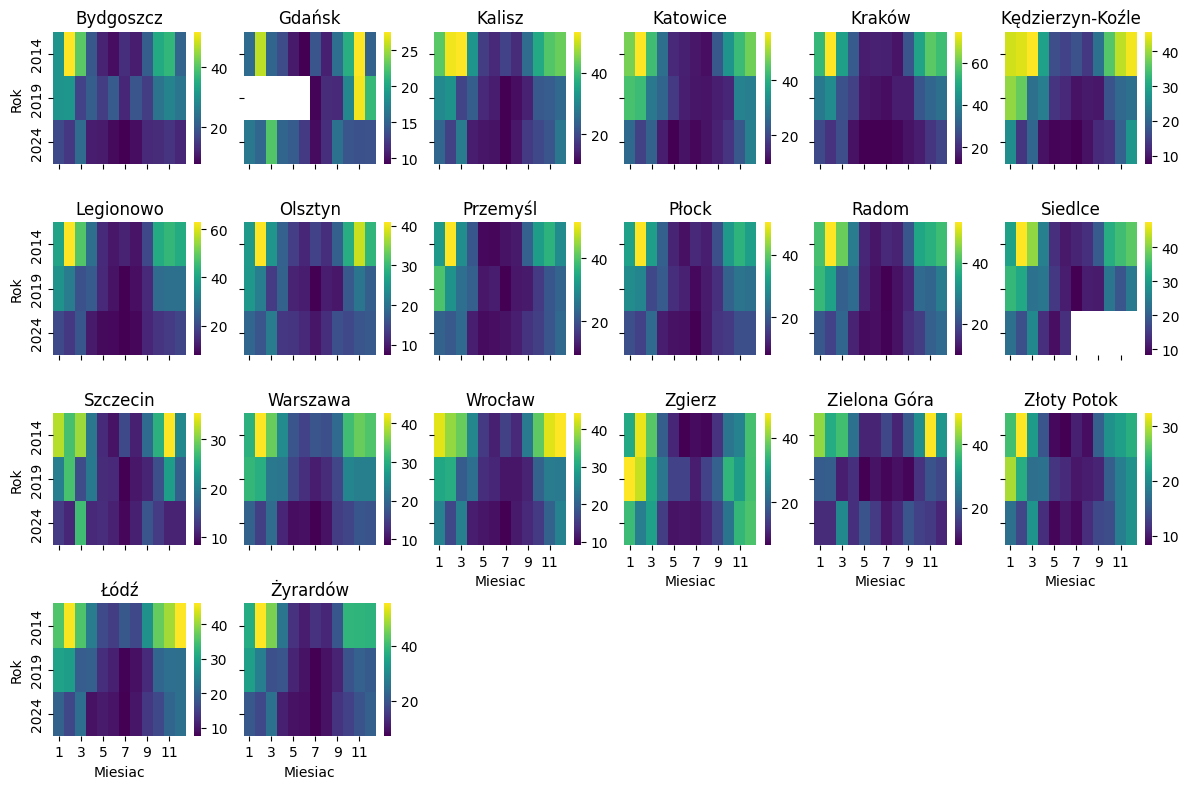

In [24]:
plot_pm25_heatmaps(monthly_city)

Interpretacja wyników:

W większości miejscowości można zaobserwować stosunkowo podobne trendy (analogiczne do tych zaobserwowanych w zad. 2).
W miesiącach zimowych występują najwyższe stężenia PM2.5 - prawdopodobnie powiązane z ogrzewaniem domów.
W późniejszych latach są stabilnie niższe stężenia PM2.5 - potencjalnie związane z modernizacją systemów grzewczych i zaostrzeniem norm emisji.

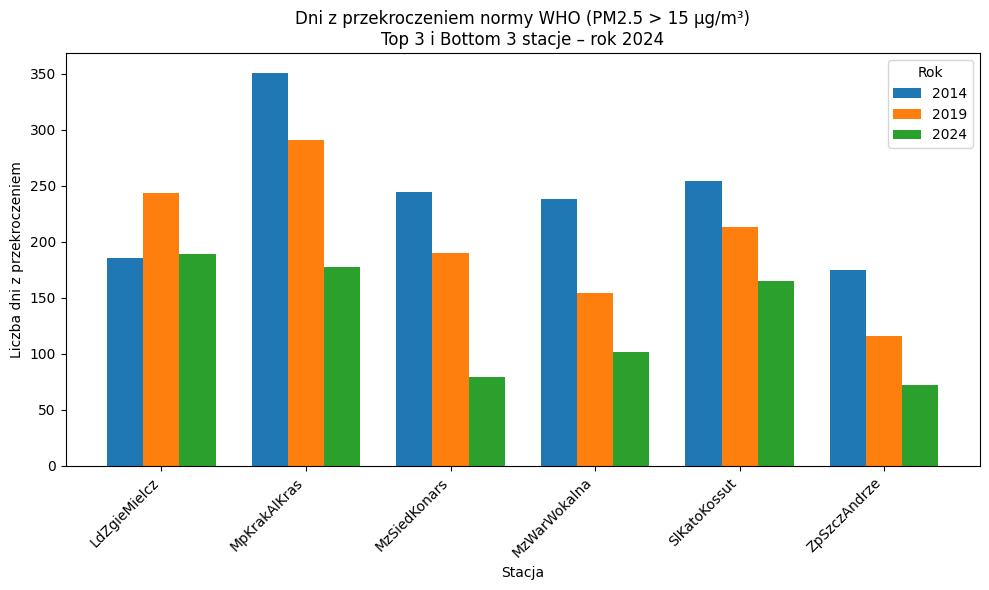

Rok,2014,2019,2024
Kod_stacji,,,
LdZgieMielcz,186,244,189
MpKrakAlKras,351,291,178
MzSiedKonars,245,190,79
MzWarWokalna,238,154,102
SlKatoKossut,254,213,165


In [30]:
df_long["Rok"] = df_long["Data"].dt.year
daily = daily_station_mean(df_long)
counts = exceedance_days_per_year(daily, threshold=15)

selected = select_top_bottom_stations(counts, year=2024, k=3)

pivot = plot_exceedance_bars(
    counts,
    selected,
    title="Dni z przekroczeniem normy WHO (PM2.5 > 15 µg/m³)\nTop 3 i Bottom 3 stacje – rok 2024"
)

pivot.head()

### Opis i interpretacja:
##### Stacje o najniższych przekroczeniach w 2024 roku:
- KpBydPlPozna (Bydgoszcz)
- MzWarWokalna (Warszawa)
- MzSiedKonars (Siedlce)

Warszawa i Bydgoszcz wykazują silny spadek stężeń PM2.5 pomiędzy 2014 i 2024, aczkolwiek w Bydgoszczy cały spadek zaszedł pomiędzy 2019 a 2024.

Siedlce to przypadek szczególny - brakuje danych z drugiej połowy 2024, co prowadzi do drastycznego zaniżenia liczby dni z przekroczeniem normy.

##### Stacje o najwyższych przekroczeniach w 2024 roku:
- LdZgieMielcz (Zgierz)
- SlKatoKossut (Katowice)
- MpKrakAlKras (Kraków)

Kraków i Katowice mają stosunkowo wysokie stężenia PM2.5 (oraz liczby dni przekroczeń), ale wykazują stabilny spadek.

Zgierz odbiega od trendu - w 2019 stężenia wzrosły, a w 2024 nadal są powyżej wartości z 2014 (pomimo spadku). To sugeruje wpływ czynników lokalnych.
